# Hi ! I am Ankit, I am going to make a project on Data analytics with Exploratory Data Analysis on the dataset of 'Festival Sales'.
In this project i will perform all needed process of Data Analytics to get useful Insights and Decisions.

Pandas -
When working with tabular data, such as data stored in spreadsheets or databases, pandas is the right tool. pandas will help to explore, clean, and process the data. In pandas, a data table is called a DataFrame.

numPy -


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
#importing DataSet
df = pd.read_csv('D:/CSE (AI & ML)/Data Analytics Internship/Project 2 - DA Festive Sales Analysis/Festival Sales Data.csv', encoding= 'unicode_escape')
#as this file is from another file location so i used "encoding = unicode_escape" to avoid unicode Error.

In [16]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Virat Kohli,P00125942,M,26-35,35,1,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,M,26-35,28,0,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,MS Dhoni,P00118542,M,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Rohit S.,P00237842,M,24-40,39,1,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Bumrah,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [18]:
df.shape #it count no. of Rows and Columns

(11251, 15)

In [19]:
#It gives detailed information about the dataset (column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Data Cleaning

In [20]:
#Removing Null Columns from the dataset as it has 2 null columns
df.drop(['Status','unnamed1'], axis=1, inplace=True)
#drop is used to delete/remove that column named in [] bracket, axis=1: used to select whole column that is to remove, 
#inplace=True: used to save/permanent applied.

In [21]:
#Checking 2 columns are Deleted or not.
df.info()
#now 2 null columns are deleted.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [24]:
#Now Checking Null values in our Dataset.
pd.isnull(df) #not useful method but just for information

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
#Checking Null Value, adding sum() will count all null values from each columns
pd.isnull(df).sum()
#There is 12 null values in Amount Column

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [26]:
#Now I have to Delete that Rows which contains the Null values
df.dropna(inplace=True) #drop null values

In [27]:
#checking deleted or not
df.shape
#Before (11251, 13) : After Droping Null Values (11239, 13)

(11239, 13)

In [29]:
#Changing Data Type of Amount from float to integer
df['Amount']= df['Amount'].astype('int')

In [30]:
df['Amount'].dtypes #Data Type Changed

dtype('int32')

In [41]:
#Generally Changing Rename of Column
df.rename(columns={'Occupation':'Profession'} ,inplace=True)

In [44]:
df.head() # Column is renamed

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Profession,Product_Category,Orders,Amount
0,1002903,Virat Kohli,P00125942,M,26-35,35,1,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,M,26-35,28,0,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,MS Dhoni,P00118542,M,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Rohit S.,P00237842,M,24-40,39,1,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Bumrah,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [45]:
df.describe()
#Stastistical Summary of the dateset same as summary() function in R

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.412403,0.420233,2.489634,9453.610553
std,1.716039e+03,12.752596,0.493618,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [49]:
#Summary of specific column
df[['Age','Orders', 'Amount']].describe()
#from this description analyse the mean, min, and max of Amount,Order and Age

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.412403,2.489634,9453.610553
std,12.752596,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

# Gender

<Axes: xlabel='Gender', ylabel='count'>

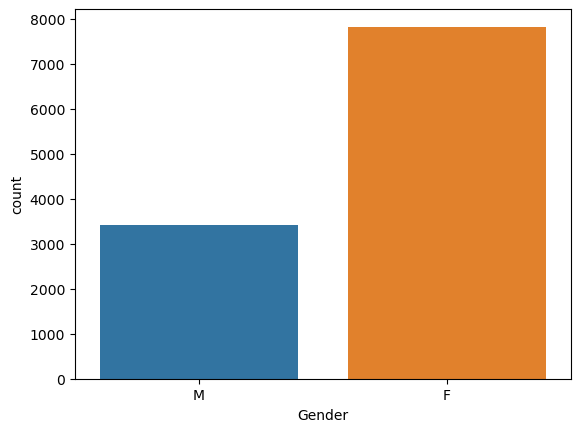

In [50]:
#Countplot for Gender Column to know Male Female Customer using seaborn library
sb.countplot(x= 'Gender', data = df)

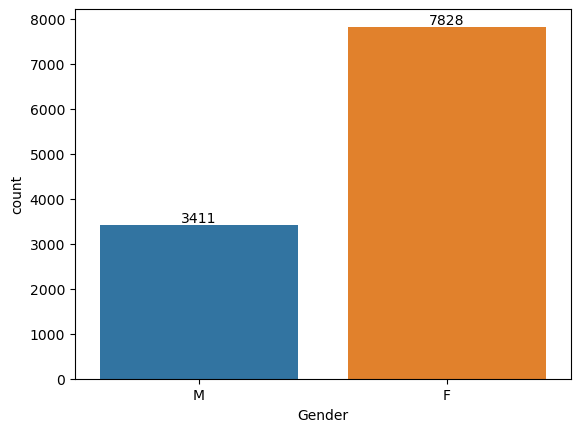

In [51]:
# for gender count lebel for Male and Female
gd = sb.countplot(x= 'Gender', data = df)

for bars in gd.containers:
    gd.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

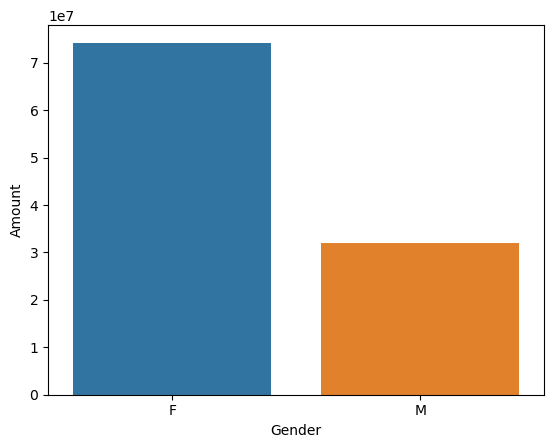

In [55]:
#Making group of Gender by Male/Female, Amount is summed spend by eace gender, amount is sorted.
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sb.barplot(x = 'Gender', y = 'Amount', data= sales_gen)

From the Graph we can say that most buyers are Females than the males And Also Females has more purchase amount.

# Age Analysis

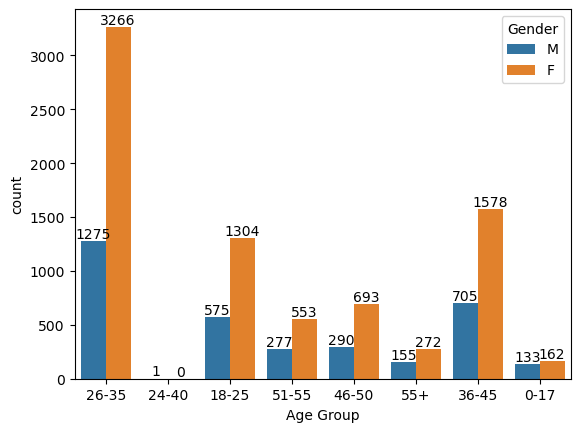

In [58]:
#Same Analysis as Gender, Analysing Age group
age = sb.countplot(x='Age Group', data = df, hue = 'Gender')

for bars in age.containers:
    age.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

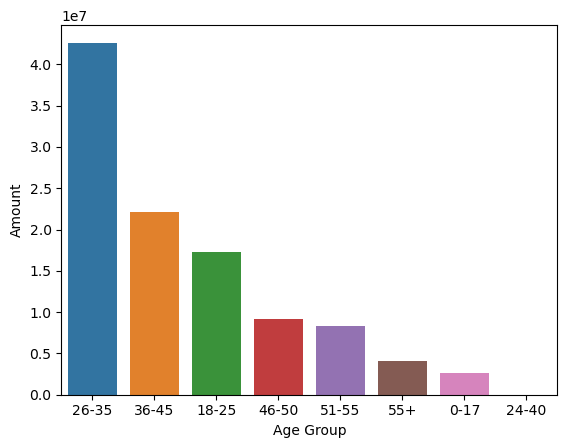

In [60]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending= False)
sb.barplot(x='Age Group', y='Amount', data = sales_age)

From the above Graphs it is analysed that Age Group 26-35 has most purchases and Purchase Amount from female


# State Wise Analysis

<Axes: xlabel='State', ylabel='Orders'>

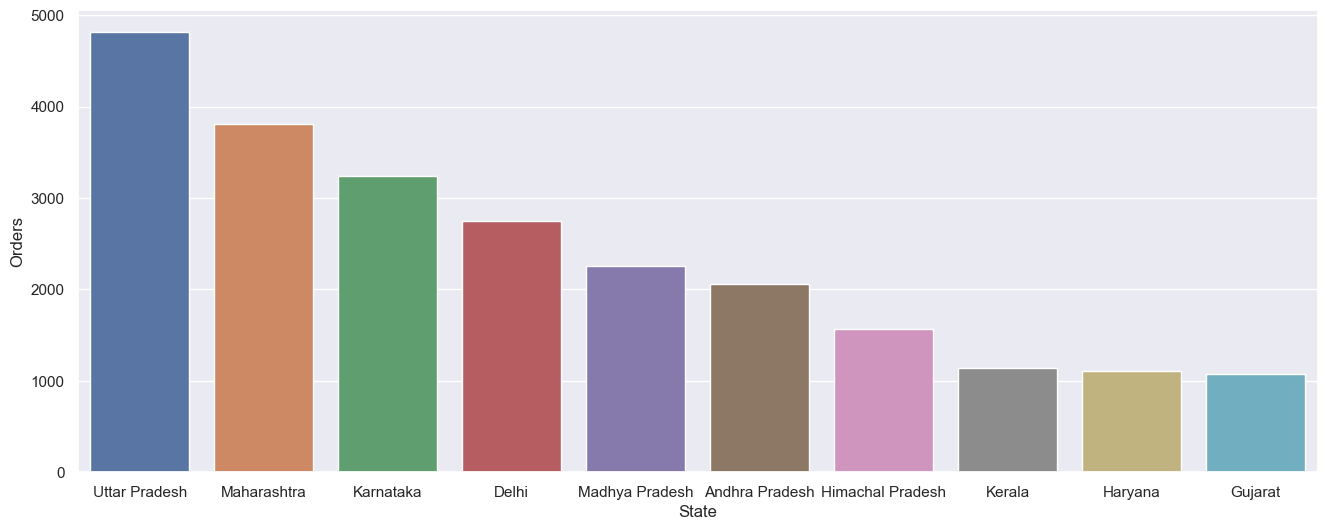

In [11]:
#anlysing states and their orders
state_ord = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by='Orders', ascending = False).head(10)

#figure size is set for Clear Graph (Width,Height)
sb.set(rc={'figure.figsize':(16,6)})
sb.barplot(x='State', y='Orders', data = state_ord)

<Axes: xlabel='State', ylabel='Amount'>

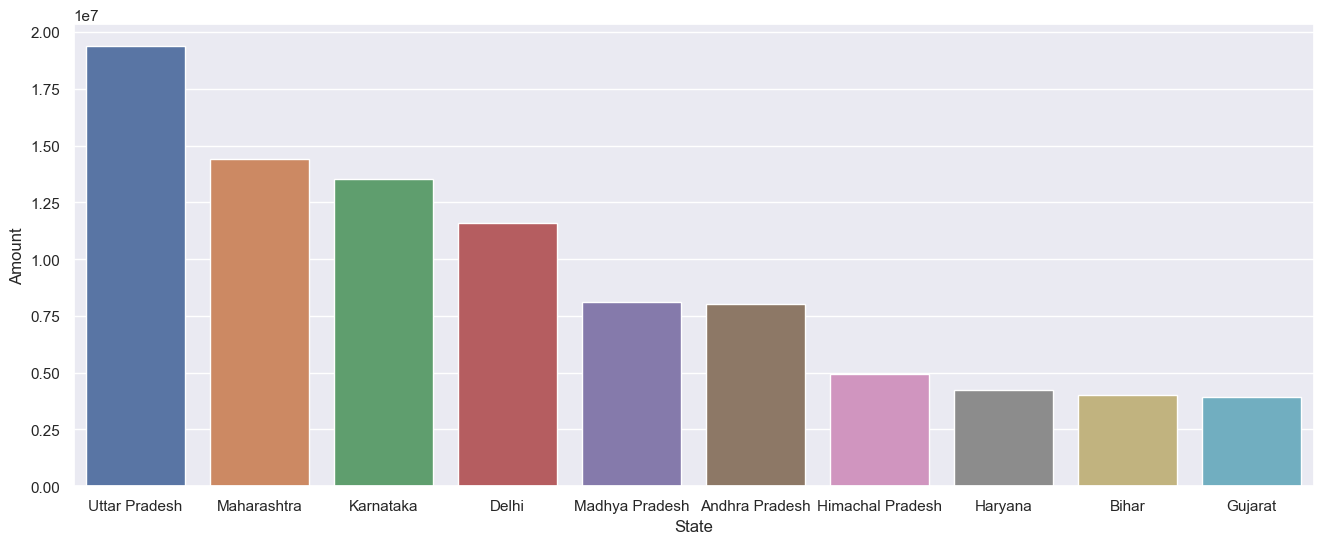

In [14]:
#Same analysis with State and Their Amount Spend
state_amt = df.groupby(['State'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sb.set(rc={'figure.figsize':(16,6)})
sb.barplot(x='State', y='Amount', data= state_amt)

From above 2 Graphs of State analyse : most of the oreders and spends are came from Uttar Pradesh. Also Kerla has more orders than Haryana but Haryana has more purchase spends than Kerla.

# Marital_Status Analysis

<Axes: xlabel='Marital_Status', ylabel='Amount'>

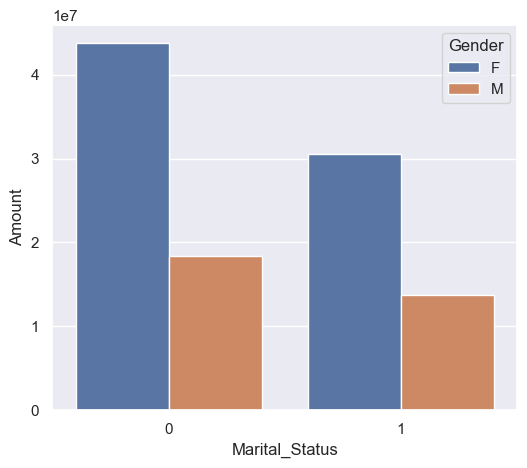

In [25]:
sales_mrt= df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sb.set(rc={'figure.figsize':(6,5)})
sb.barplot(x='Marital_Status', y='Amount', data= sales_mrt, hue='Gender')

Analysis: From Above Graph Most of the Amount Spent by Married women.

# Occupation Analysis

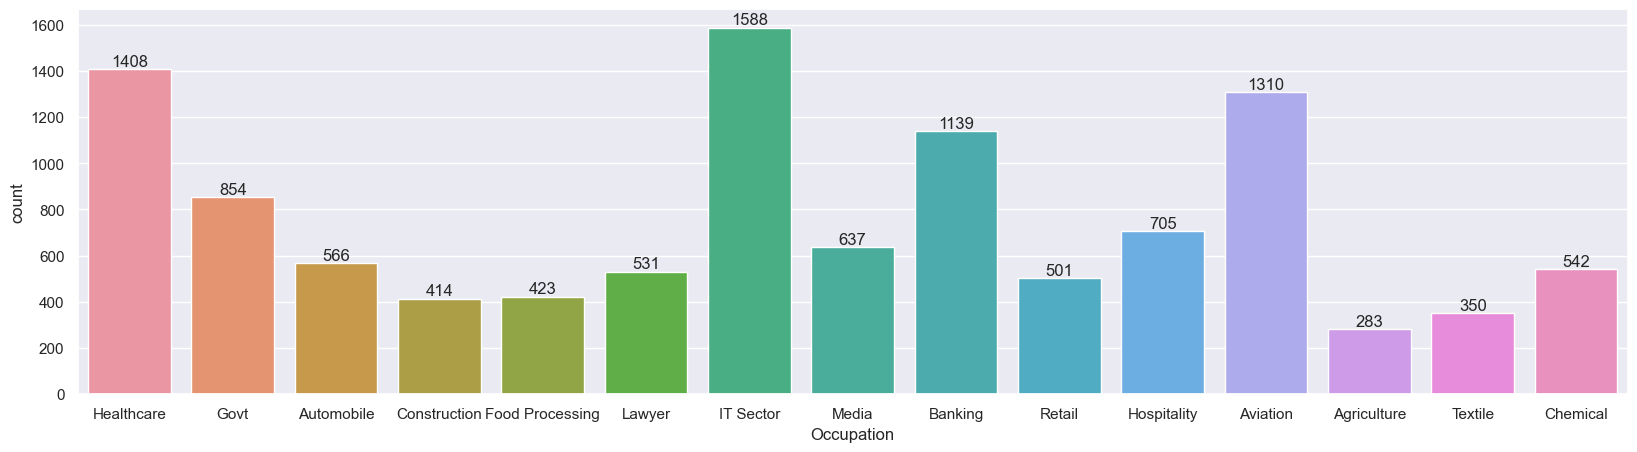

In [36]:
sb.set(rc={'figure.figsize':(20,5)})
Occ =sb.countplot(x='Occupation', data=df)

for bars in Occ.containers:
    Occ.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

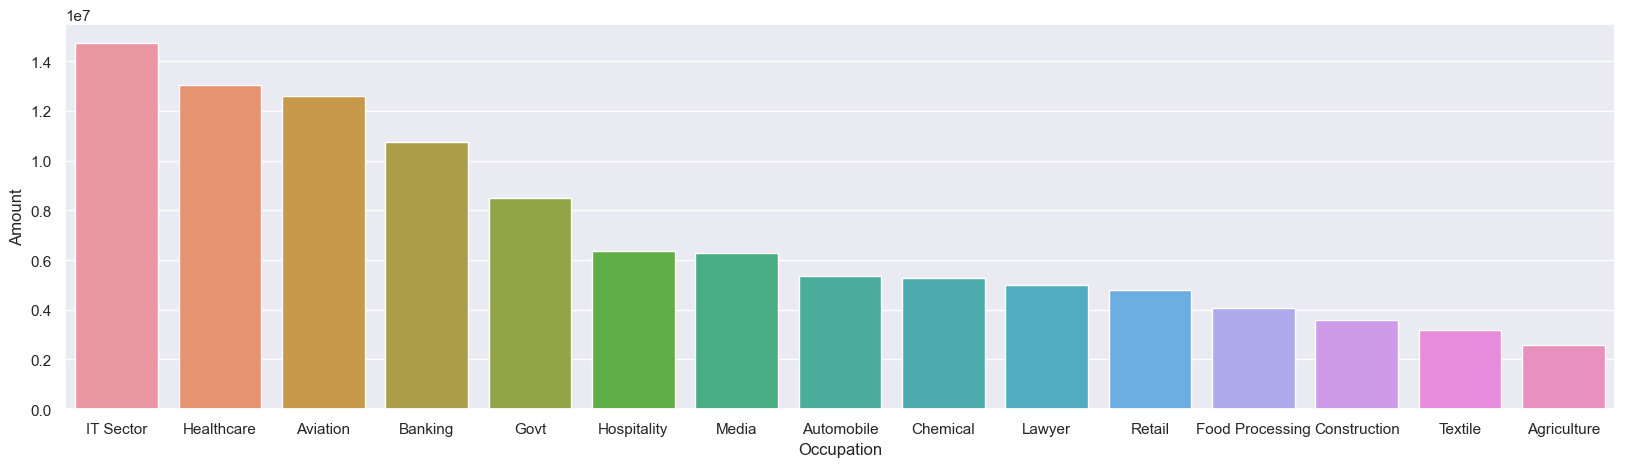

In [38]:
sales_occ = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)


sb.barplot(x='Occupation', y='Amount', data=sales_occ)

Analysis: From Above Graphs Most of the Buyers are from IT Sector, then Healthcare, Aviation and Banking so on.

# Product_Category Analysis

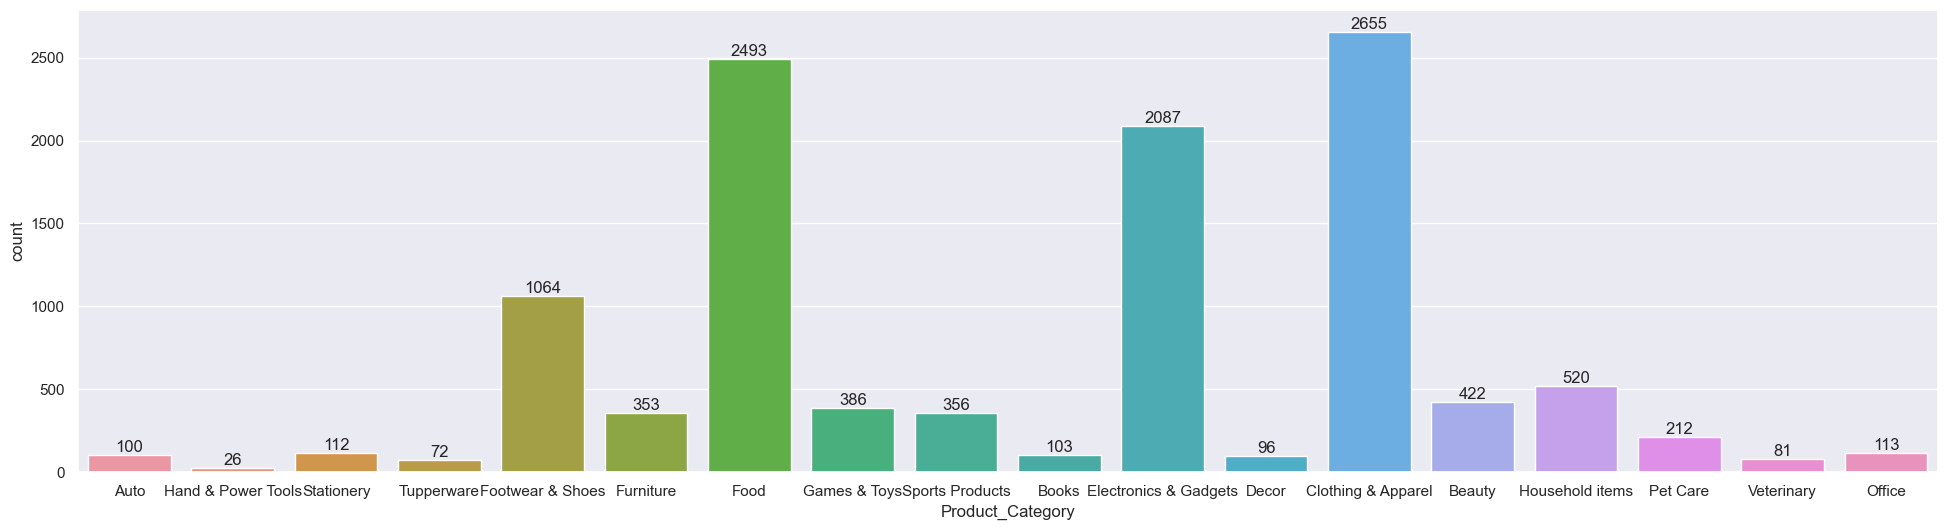

In [47]:
sb.set(rc={'figure.figsize': (24,6)})
prod= sb.countplot(x='Product_Category', data=df)

for bars in prod.containers:
    prod.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

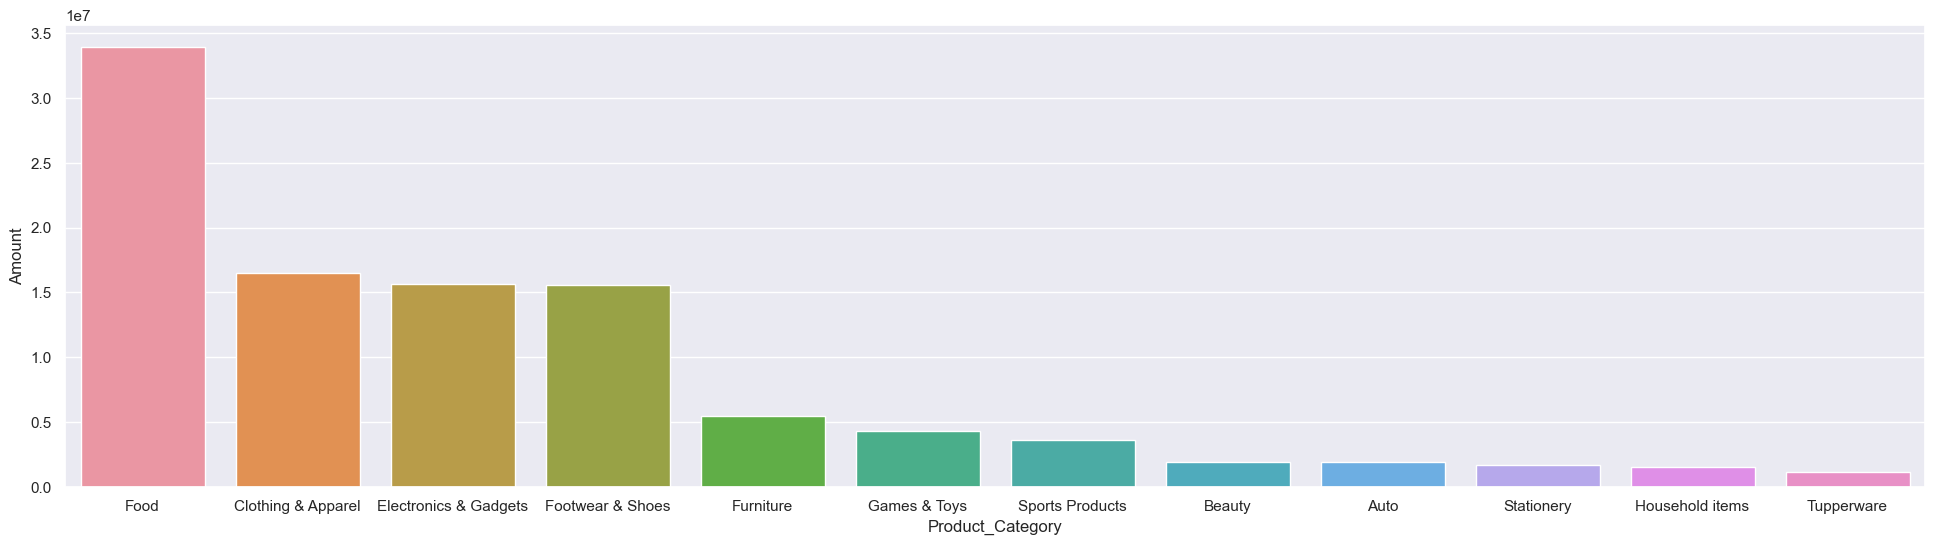

In [52]:
sales_prod= df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(12)

sb.barplot(x= 'Product_Category', y= 'Amount', data= sales_prod)


Analysis: From Above Graphs Most of the Amount are spent in FOOD, While most Orders are from Clothing.

<Axes: xlabel='Product_ID', ylabel='Orders'>

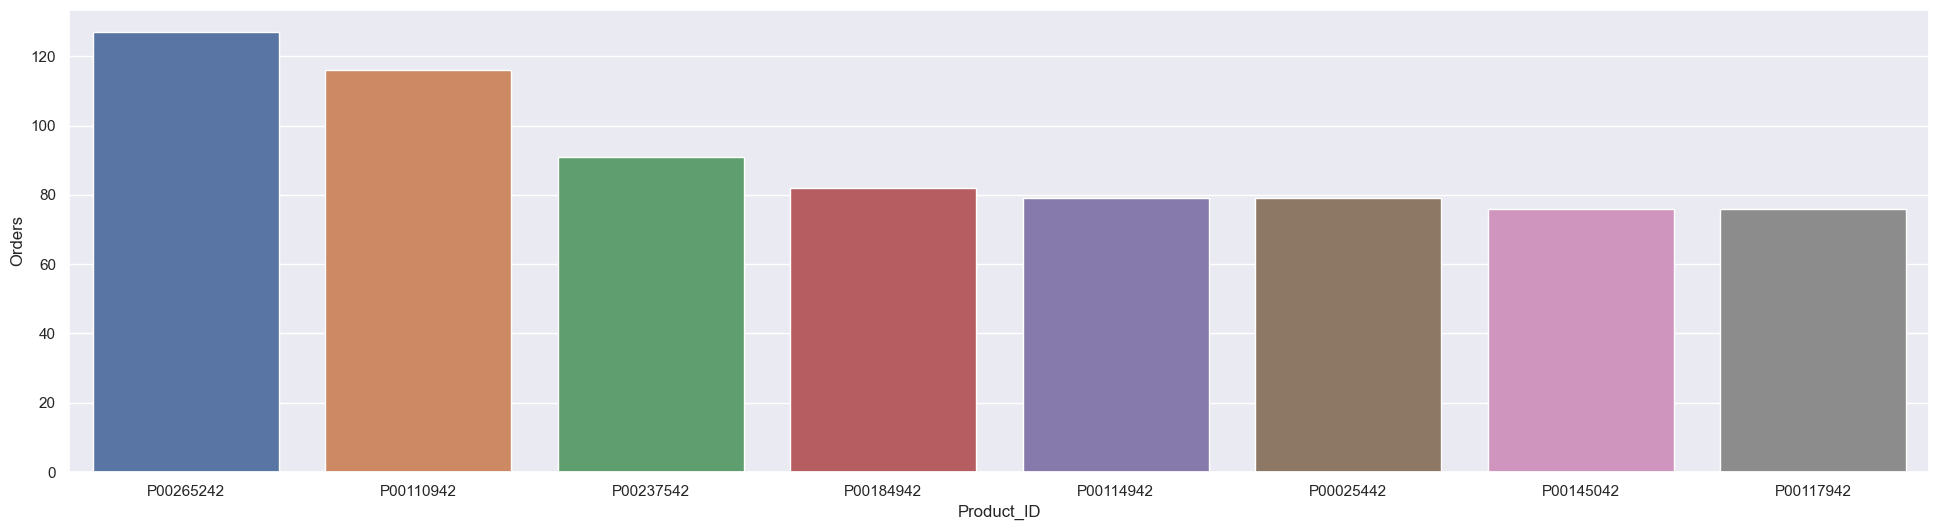

In [58]:
pID = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(8)
sb.barplot(x='Product_ID', y='Orders', data=pID)

# Conclusions

*From the above analysis: 
    1. Most of the customers are female 
    2. Most Expenses by female
    3. Their Age Group btw 25-35
    4. Most orders and Purchase from Uttar Pradesh, Maharashtra, Karnataka and Delhi Respectively.
    5. Most Amount Spent by Married and Specially Women.
    6. Most of the Buyers are from IT Sector, then Healthcare, Aviation and Banking.
    7. Most of the Amount are spent in FOOD, While most Orders are from Clothing.*